# Entregable Numero 1

## Obtención de los datos desde la API del ministerio de salud

Los datos se obtienen desde la API del ministerio de salud sobre enfemedades respiratorias agudas.

In [1]:
import requests
import pandas as pd

# llama a la API y obtiene los datos
def get_enfermedades_respiratorias_agudas_data():
    url = "http://datos.salud.gob.ar/dataset/c553d917-36f4-4063-ac02-1686a9120e1c/resource/26c85a05-d4e3-4124-b7d2-e087a6cc5f24/download/vigilancia-de-infecciones-respiratorias-agudas.json"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        return "Error al obtener los datos de la API"
    

# obtengo los datos de la API
data = get_enfermedades_respiratorias_agudas_data()

# creo un dataframe con los datos obtenidos
er_df = pd.DataFrame(data)

# muestro los 50 primeros registros del dataframe
er_df.head(50)


,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
0,140,SAN FERNANDO,22,Chaco,2018,46,Enfermedad tipo influenza (ETI),1,< 6 m,1
1,140,SAN FERNANDO,22,Chaco,2018,46,Enfermedad tipo influenza (ETI),2,6 a 11 m,3
2,140,SAN FERNANDO,22,Chaco,2018,46,Enfermedad tipo influenza (ETI),3,12 a 23 m,5
3,140,SAN FERNANDO,22,Chaco,2018,46,Enfermedad tipo influenza (ETI),4,2 a 4,8
4,140,SAN FERNANDO,22,Chaco,2018,46,Enfermedad tipo influenza (ETI),5,5 a 9,4
5,140,SAN FERNANDO,22,Chaco,2018,46,Enfermedad tipo influenza (ETI),6,10 a 14,3
6,140,SAN FERNANDO,22,Chaco,2018,46,Enfermedad tipo influenza (ETI),7,15 a 19,2
7,140,SAN FERNANDO,22,Chaco,2018,46,Enfermedad tipo influenza (ETI),8,20 a 24,2
8,21,CHICLIGASTA,90,Tucuman,2018,46,Enfermedad tipo influenza (ETI),9,25 a 34,2
9,21,CHICLIGASTA,90,Tucuman,2018,46,Enfermedad tipo influenza (ETI),10,35 a 44,1


<Axes: >

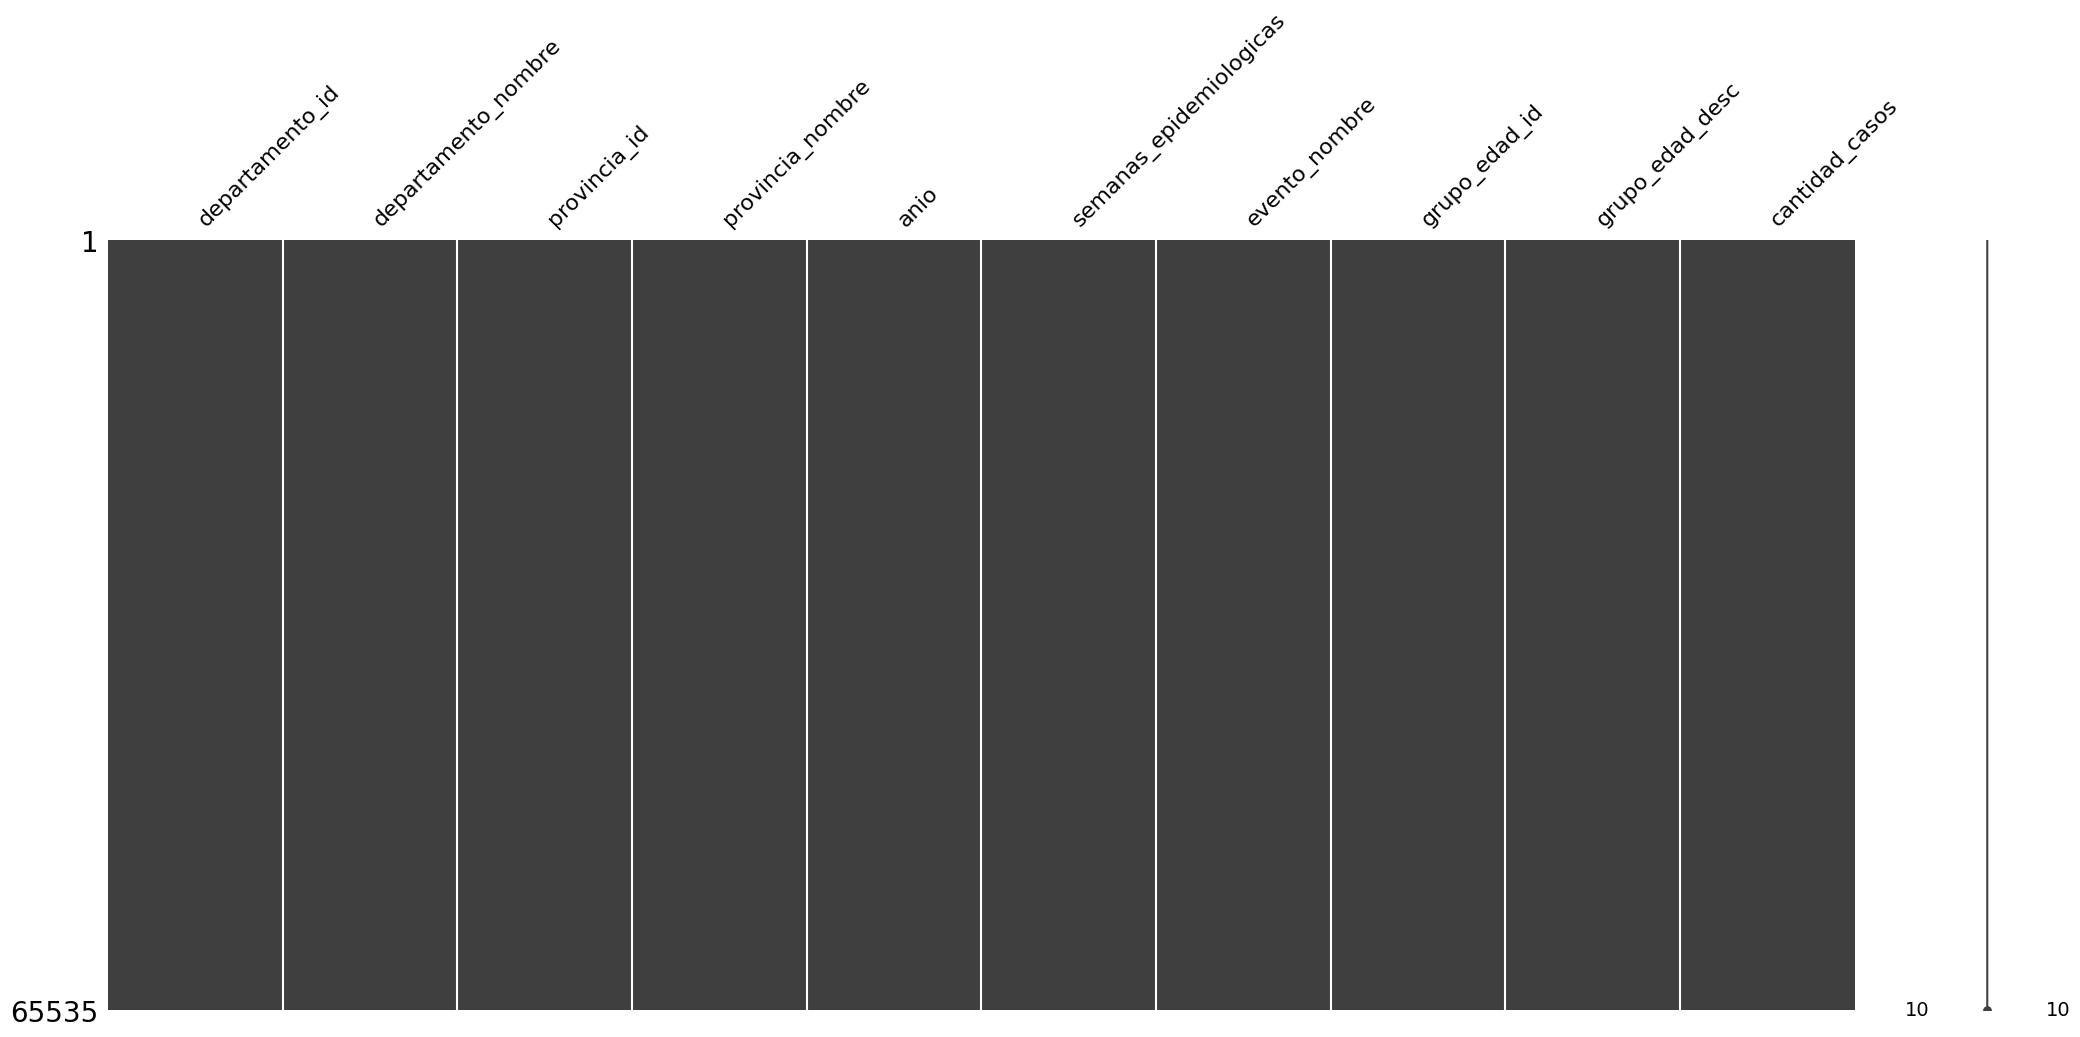

In [2]:
# analizo posibles inconsistencias con la libreria missingno

import missingno as msno

msno.matrix(er_df)

In [3]:
# agrupo los datos por provincia, evento y anio y muestra la cantidad de casos
df_grouped = er_df.groupby(['provincia_nombre', 'evento_nombre', 'anio']).size().reset_index(name='cantidad_casos')
df_grouped = df_grouped.sort_values('provincia_nombre', ascending=False)
df_grouped.head(50)


,provincia_nombre,evento_nombre,anio,cantidad_casos
143,Tucuman,Neumonia,2019,47
142,Tucuman,Neumonia,2018,304
141,Tucuman,Enfermedad tipo influenza (ETI),2019,133
140,Tucuman,Enfermedad tipo influenza (ETI),2018,1434
139,Tucuman,Bronquiolitis en menores de 2 anos,2019,43
138,Tucuman,Bronquiolitis en menores de 2 anos,2018,420
137,Tierra del Fuego,Neumonia,2019,22
136,Tierra del Fuego,Neumonia,2018,103
135,Tierra del Fuego,Enfermedad tipo influenza (ETI),2019,28
134,Tierra del Fuego,Enfermedad tipo influenza (ETI),2018,148


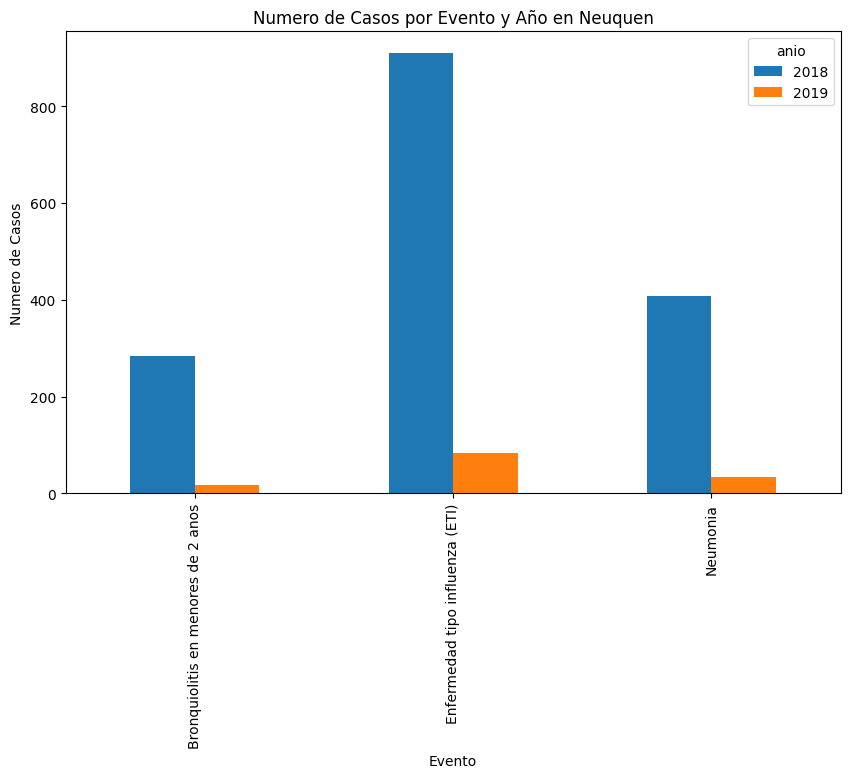

In [4]:
import matplotlib.pyplot as plt

# filtro los datos por provincia en este caso 'Neuquen'
df_neuquen = df_grouped[df_grouped['provincia_nombre'] == 'Neuquen']

# grafico la cantidad de casos por evento y año en Neuquen
df_neuquen.pivot(index='evento_nombre', columns='anio', values='cantidad_casos').plot(kind='bar', figsize=(10, 6))
plt.xlabel('Evento')
plt.ylabel('Numero de Casos')
plt.title('Numero de Casos por Evento y Año en Neuquen')
plt.show()


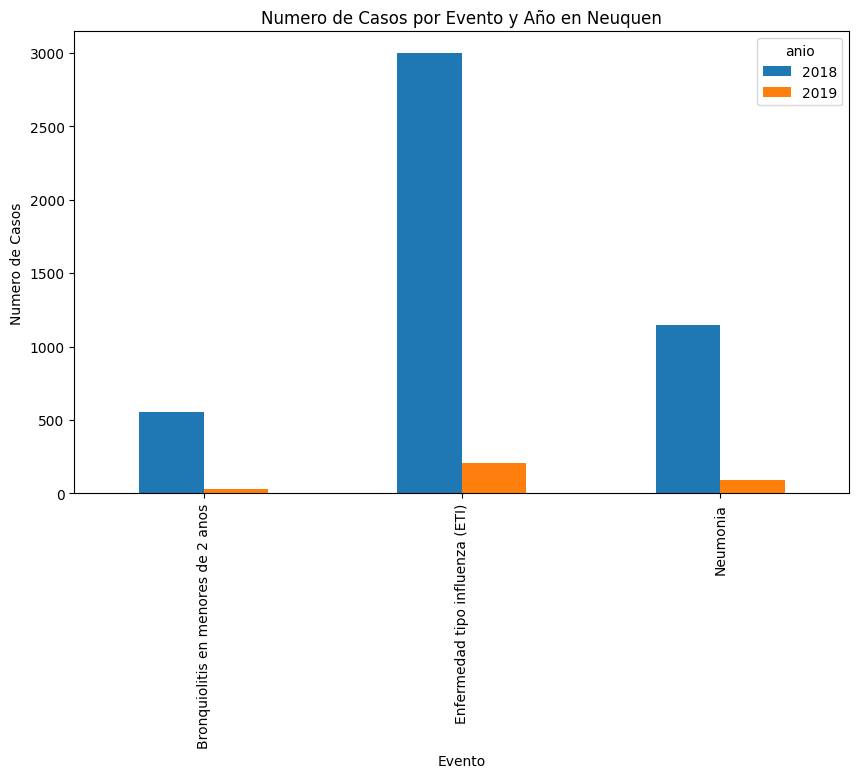

In [5]:
import matplotlib.pyplot as plt

# filtro los datos por provincia en este caso 'Cordoba'
df_neuquen = df_grouped[df_grouped['provincia_nombre'] == 'Cordoba']

# grafico la cantidad de casos por evento y año en Cordoba
df_neuquen.pivot(index='evento_nombre', columns='anio', values='cantidad_casos').plot(kind='bar', figsize=(10, 6))
plt.xlabel('Evento')
plt.ylabel('Numero de Casos')
plt.title('Numero de Casos por Evento y Año en Neuquen')
plt.show()

# Entregable Numero 2

## Carga de datos a Amazon Redshift

In [16]:
import os
from sqlalchemy import create_engine, text


# importo las variables de entorno
REDSHIFT_HOST = os.environ["HOST"]
REDSHIFT_USER = os.environ["USER"]
REDSHIFT_PASSWORD = os.environ["PASSWORD"]
REDSHIFT_PORT = os.environ["PORT"]
REDSHIFT_DB = os.environ["DBNAME"]

# conecto a la base de datos
conn = create_engine(f"postgresql://{REDSHIFT_USER}:{REDSHIFT_PASSWORD}@{REDSHIFT_HOST}:{REDSHIFT_PORT}/{REDSHIFT_DB}")

# verificamos la conexion
try:
    with conn.connect() as connection:
        result = connection.execute(text("SELECT 1"))
        print("Conexión exitosa:", result.scalar() == 1)
except Exception as e:
    print("Error al conectar a la base de datos:", e)

# subo el dataframe a la base de datos en redshift en lotes de 1000 registros debido al tamaño del dataframe (+- 66.000 registros)
er_df.to_sql(name='seguimiento_enfermedades_respiratorias', con=conn, schema='lucasleone95_coderhouse', if_exists='replace', index=False, chunksize=1000)


Conexión exitosa: True


65535

In [17]:
# consulto la base de datos
def run_query(sql):
    result = conn.connect().execute((text(sql)))
    return pd.DataFrame(result.fetchall(), columns=result.keys())

query_consult = """SELECT * FROM seguimiento_enfermedades_respiratorias LIMIT 10;"""

run_query(query_consult)

,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
0,140,SAN FERNANDO,22,Chaco,2018,46,Enfermedad tipo influenza (ETI),1,< 6 m,1
1,140,SAN FERNANDO,22,Chaco,2018,46,Enfermedad tipo influenza (ETI),3,12 a 23 m,5
2,140,SAN FERNANDO,22,Chaco,2018,46,Enfermedad tipo influenza (ETI),5,5 a 9,4
3,140,SAN FERNANDO,22,Chaco,2018,46,Enfermedad tipo influenza (ETI),7,15 a 19,2
4,21,CHICLIGASTA,90,Tucuman,2018,46,Enfermedad tipo influenza (ETI),9,25 a 34,2
5,21,CHICLIGASTA,90,Tucuman,2018,46,Enfermedad tipo influenza (ETI),11,45 a 64,5
6,21,CHICLIGASTA,90,Tucuman,2018,46,Neumonia,11,45 a 64,1
7,21,CHICLIGASTA,90,Tucuman,2018,46,Bronquiolitis en menores de 2 anos,1,< 6 m,3
8,0,CIUDAD DE BUENOS AIRES,2,CABA,2018,45,Neumonia,4,2 a 4,1
9,28,CAPITAL,54,Misiones,2018,45,Enfermedad tipo influenza (ETI),5,5 a 9,1


# Entregable Numero 3

## DAGs en Airflow

In [ ]:
from airflow import DAG
from airflow.operators.python_operator import PythonOperator
from datetime import datetime

# Defino el DAG y sus argumentos basicos para que se ejecute diariamente a la medianoche (en este caso)
dag = DAG(
    dag_id='enfermedades_respiratorias_agudas',
    start_date=datetime(2022, 1, 1),
    schedule_interval='0 0 * * *'  # Run the DAG daily at midnight
)

# Defino las funciones que se ejecutaran en cada tarea
def task1():
    print("Running task 1")

def task2():
    print("Running task 2")

def task3():
    print("Running task 3")

# Defino los operadores que ejecutaran las tareas
task1_operator = PythonOperator(
    task_id='task1',
    python_callable=task1,
    dag=dag
)

task2_operator = PythonOperator(
    task_id='task2',
    python_callable=task2,
    dag=dag
)

task3_operator = PythonOperator(
    task_id='task3',
    python_callable=task3,
    dag=dag
)

# Defino el orden en que se ejecutaran las tareas
task1_operator >> task2_operator >> task3_operator
